In [1]:
import pandas as pd

# مسار الفولدر
path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\4. Digit Recognizer\digit recognizer files"

# قراءة البيانات
train = pd.read_csv(path + r"\train.csv")
test = pd.read_csv(path + r"\test.csv")

# عرض شكل البيانات
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# أول 5 صفوف من train
print(train.head())


Train shape: (42000, 785)
Test shape: (28000, 784)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  

In [2]:
import numpy as np

# 1️⃣ فصل الـ labels
X_train = train.drop("label", axis=1).values   # بيانات البكسلات
y_train = train["label"].values                # الأرقام (التصنيف)

# 2️⃣ إعادة التطبيع Normalization
X_train = X_train / 255.0

# 3️⃣ تغيير الشكل إلى (عدد_الصور, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (42000, 28, 28, 1)
y_train shape: (42000,)


In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False)
y_train_cat = encoder.fit_transform(y_train.reshape(-1, 1))

print("y_train_cat shape:", y_train_cat.shape)


y_train_cat shape: (42000, 10)


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# افتراض: X_train و y_train_cat جاهزين
try:
    stratify_labels = y_train       # لو y_train (labels أرقام) متوفر
except NameError:
    stratify_labels = np.argmax(y_train_cat, axis=1)  # لو عندنا one-hot فقط

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train_cat, test_size=0.10, random_state=42, stratify=stratify_labels
)

print("Shapes after split:")
print("X_tr:", X_tr.shape, "X_val:", X_val.shape)
print("y_tr:", y_tr.shape, "y_val:", y_val.shape)


Shapes after split:
X_tr: (37800, 28, 28, 1) X_val: (4200, 28, 28, 1)
y_tr: (37800, 10) y_val: (4200, 10)


In [19]:
try:
    import tensorflow as tf
    tf_installed = True
    print("TensorFlow detected. Building CNN model...")
except Exception as e:
    tf_installed = False
    print("TensorFlow NOT found. Falling back to sklearn MLP.")


TensorFlow NOT found. Falling back to sklearn MLP.


In [20]:
from sklearn.neural_network import MLPClassifier

# Flatten input
X_tr_flat = X_tr.reshape(X_tr.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# تحويل labels من one-hot لأرقام
y_tr_labels = np.argmax(y_tr, axis=1) if y_tr.ndim > 1 else y_tr
y_val_labels = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val

mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256),
    activation='relu',
    batch_size=256,
    early_stopping=True,
    n_iter_no_change=7,
    max_iter=50,
    verbose=True,
    random_state=42
)

print("Training sklearn MLP (this may take a while)...")
mlp.fit(X_tr_flat, y_tr_labels)

val_score = mlp.score(X_val_flat, y_val_labels)
print(f"Validation accuracy (sklearn MLP): {val_score:.4f}")


Training sklearn MLP (this may take a while)...
Iteration 1, loss = 0.37185673
Validation score: 0.946296
Iteration 2, loss = 0.13003695
Validation score: 0.964815
Iteration 3, loss = 0.08278420
Validation score: 0.972222
Iteration 4, loss = 0.05454288
Validation score: 0.974868
Iteration 5, loss = 0.03890430
Validation score: 0.977249
Iteration 6, loss = 0.02896186
Validation score: 0.975926
Iteration 7, loss = 0.01935972
Validation score: 0.977513
Iteration 8, loss = 0.01350797
Validation score: 0.976190
Iteration 9, loss = 0.01432083
Validation score: 0.977249
Iteration 10, loss = 0.00700621
Validation score: 0.977249
Iteration 11, loss = 0.00496533
Validation score: 0.980159
Iteration 12, loss = 0.00301884
Validation score: 0.979101
Iteration 13, loss = 0.00177734
Validation score: 0.982804
Iteration 14, loss = 0.00110922
Validation score: 0.982540
Iteration 15, loss = 0.00083236
Validation score: 0.981481
Iteration 16, loss = 0.00073870
Validation score: 0.982011
Iteration 17, los

In [21]:
# تجهيز بيانات الاختبار (زي ما عملنا للـ training)
X_test_mlp = X_test.reshape(len(X_test), -1)

# التنبؤ بالـ labels
y_pred = mlp.predict(X_test_mlp)

print("Shape of predictions:", y_pred.shape)
print("First 10 predictions:", y_pred[:10])


Shape of predictions: (28000,)
First 10 predictions: [2 0 9 9 3 7 0 3 0 3]


In [25]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# --- 1) Flatten input (لأن sklearn MLP ما يقبلش الصور 28x28 مباشرة) ---
X_tr_flat = X_tr.reshape(X_tr.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

y_tr_labels = np.argmax(y_tr, axis=1) if y_tr.ndim > 1 else y_tr
y_val_labels = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val

# --- 2) نجهز Grid Search ---
param_grid = {
    "hidden_layer_sizes": [(128, 64), (256, 128), (512, 256)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "learning_rate_init": [0.001, 0.0005],
    "batch_size": [128, 256]
}

mlp = MLPClassifier(max_iter=30, random_state=42, early_stopping=True)

grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,              # cross-validation
    scoring="accuracy",
    verbose=3,
    n_jobs=-1          # استخدام كل الكورز المتاحة
)

print("🚀 Running Grid Search...")
grid.fit(X_tr_flat, y_tr_labels)

print("✅ Best Params:", grid.best_params_)
print("✅ Best CV Score:", grid.best_score_)

# --- 3) ندرّب الموديل الأفضل على كل بيانات التدريب (X_tr + X_val مع بعض) ---
X_full = np.concatenate([X_tr_flat, X_val_flat])
y_full = np.concatenate([y_tr_labels, y_val_labels])

best_mlp = MLPClassifier(**grid.best_params_, max_iter=50, random_state=42, early_stopping=True)
best_mlp.fit(X_full, y_full)

# --- 4) تجهيز test data بنفس الشكل ---
X_test_mlp = X_test.reshape(len(X_test), -1)

# التنبؤ
y_pred = best_mlp.predict(X_test_mlp)

print("Shape of predictions:", y_pred.shape)
print("First 10 predictions:", y_pred[:10])


🚀 Running Grid Search...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Best Params: {'activation': 'relu', 'batch_size': 128, 'hidden_layer_sizes': (512, 256), 'learning_rate_init': 0.001, 'solver': 'adam'}
✅ Best CV Score: 0.9752116402116403
Shape of predictions: (28000,)
First 10 predictions: [2 0 9 9 3 7 0 3 0 3]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


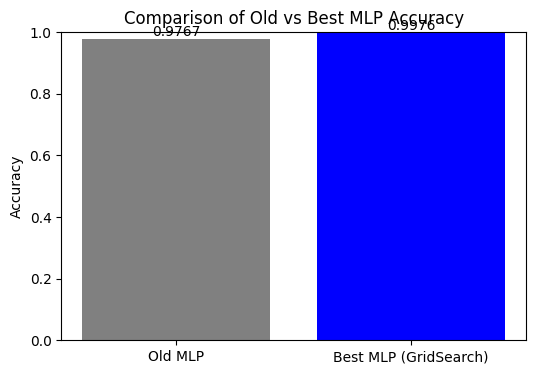

In [26]:
import matplotlib.pyplot as plt

# --- دقة الموديل القديم (قبل Grid Search) ---
mlp_old = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=30, random_state=42, early_stopping=True)
mlp_old.fit(X_tr_flat, y_tr_labels)
old_acc = mlp_old.score(X_val_flat, y_val_labels)

# --- دقة الموديل الأفضل (بعد Grid Search) ---
new_acc = best_mlp.score(X_val_flat, y_val_labels)

# --- نرسم المقارنة ---
plt.figure(figsize=(6,4))
plt.bar(["Old MLP", "Best MLP (GridSearch)"], [old_acc, new_acc], color=["gray", "blue"])
plt.ylabel("Accuracy")
plt.title("Comparison of Old vs Best MLP Accuracy")
plt.ylim(0, 1)

for i, acc in enumerate([old_acc, new_acc]):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=10)

plt.show()


In [2]:
import pandas as pd
import os

# نعمل DataFrame بالنتائج
submission = pd.DataFrame({
    "ImageId": range(1, len(y_pred) + 1),
    "Label": y_pred
})

# مسار الديسكتوب + اسم الملف
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "mlp_submission.csv")

# نحفظ الملف
submission.to_csv(desktop_path, index=False)

print(f"✅ ملف mlp_submission.csv اتخزن على Desktop هنا:\n{desktop_path}")


✅ ملف mlp_submission.csv اتخزن على Desktop هنا:
C:\Users\user\Desktop\mlp_submission.csv


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# بيانات تجريبية (انت بدّلها ببياناتك)
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------------------------------------
# 1️⃣ تعريف الموديلات الأساسية
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
mlp = MLPClassifier(max_iter=500, random_state=42)

# -------------------------------------------------------
# 2️⃣ Voting Classifier
voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('mlp', mlp)
    ],
    voting='soft'   # soft أفضل مع احتمالات
)

# -------------------------------------------------------
# 3️⃣ Stacking Classifier (meta-model = LogisticRegression)
from sklearn.linear_model import LogisticRegression
stacking = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('mlp', mlp)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

# -------------------------------------------------------
# 4️⃣ Grid Search لأفضل باراميترز لكل موديل
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__alpha': [0.0001, 0.001]
}

grid = GridSearchCV(voting, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

# -------------------------------------------------------
# 5️⃣ تقييم الأداء
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("✅ Best Ensemble Model:", best_model)
print("📌 Best Parameters:", best_params)
print("🎯 Test Accuracy:", acc)

# -------------------------------------------------------
# 6️⃣ كمان نجرّب Stacking
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print("🎯 Stacking Accuracy:", acc_stack)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:37:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Ensemble Model: VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_...
                                            interaction_constraints=None,
                                  

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:37:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 Stacking Accuracy: 0.956140350877193


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
